<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/EDA/Feature_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [4]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [5]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ... 

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [6]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

# [Starter Notebook] Feature Inspection Exercise (Practice) 

- Student Name: Echo Diaz


> This is a starter notebook for the Feature Inspection Exercise. Make sure to read the assignment instructions carefully before you start!

## EDA Functions from Lessons

### Univariate EDA Functions

In [7]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  
  ## Save null value counts and percent for printing 
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100
  
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  

### Multivariate Feature vs. Target Functions.

In [8]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added 
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

# Your Work Here:

## Import Packages and Load Data

> Add as many code cells as you need!

In [9]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Load Data
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/cereal-kaggle-crawford-modified - sheet 1.csv"
df = pd.read_csv(fpath)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,NaN,4,1.0,130,10.0,5.0,6.0,280,25,top,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5.0,15,2.0,8.0,8.0,135,0,top,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1.0,260,9.0,7.0,5.0,320,25,top,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0.0,140,14.0,8.0,0.0,330,25,top,1.0,0.50,93.704912
4,Almond Delight,R,C,NaN,2,2.0,200,1.0,14.0,8.0,-1,25,NaN,1.0,0.75,34.384843


In [12]:
#Dropping columns expect: mfr, type, calories, protein, fat, fiber, sugars, shelf
df = df.drop(columns=["name", "sodium", "carbo", "potass", "vitamins", "weight", "cups"])
df.head()

,mfr,type,calories,protein,fat,fiber,sugars,shelf,rating
0,N,C,NaN,4,1.0,10.0,6.0,top,68.402973
1,Q,C,120.0,3,5.0,2.0,8.0,top,33.983679
2,K,C,70.0,4,1.0,9.0,5.0,top,59.425505
3,K,C,50.0,4,0.0,14.0,0.0,top,93.704912
4,R,C,NaN,2,2.0,1.0,8.0,NaN,34.384843



## Answer the following questions:

- Define your target column:
  - `rating` is th our target column.
- Is this a classification or regression task? 
  - Regression because its dealing with continous numbers.

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset. 
- To make this easier you can copy and paste the template cells: 
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [13]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [14]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ... 

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [15]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

### Feature: mfr

- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina
  

In [16]:
# # Confirming the dtype to select correct EDA function
feature = "mfr"
df[feature].dtype

dtype('O')

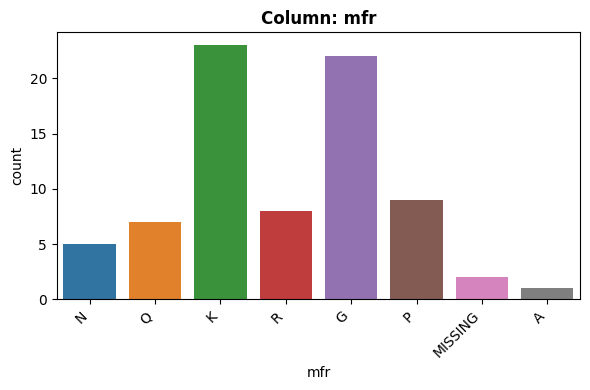

- NaN's Found: 2 (2.6%)
- Unique Values: 8
- Most common value: 'K' occurs 23 times (29.87%)
- Not constant or quasi-constant.


In [17]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical, nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2

3. Is the feature constant or quasi-constant?
  - Not constant or quasi. 

4. What is the cardinality? Is it high?
  - It's cardinality is 8, which is not considered high.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - It's possible because certain manufacturers can be highly rated.



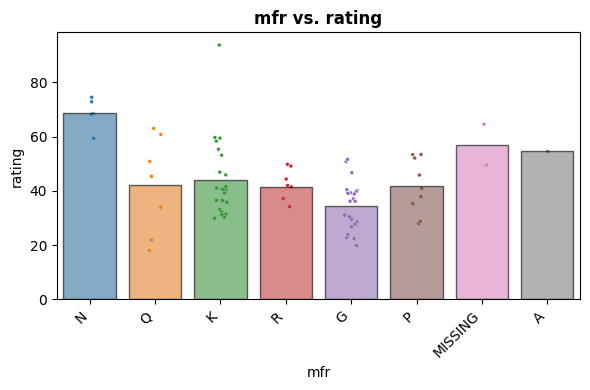

In [18]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x="mfr", y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, because some manufacturers may have higher rated cereals`
  - Does this feature appear to be a predictor of the target?
    - `Yes, it does appear that way because some manufacturers have higher rating than others.` 

___

### Feature: type

- Feature Name: type
  - cold
  - hot


In [19]:
# # Confirming the dtype to select correct EDA function
feature = "type"
df[feature].dtype

dtype('O')

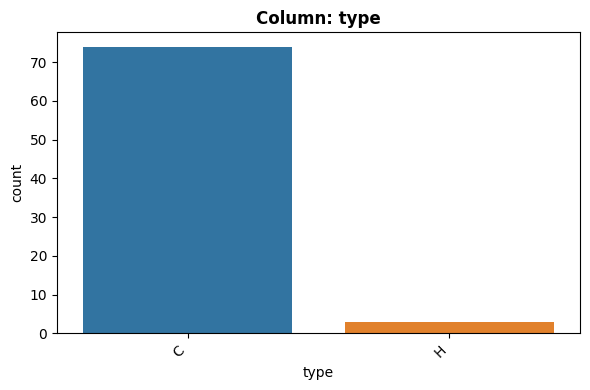

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'C' occurs 74 times (96.1%)
- Not constant or quasi-constant.


In [20]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, x="type");

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical, nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant.
4. What is the cardinality? Is it high?
  - The cardinality is 2 and it is not high.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, I think it should be included as hot cereals could boost ratings.


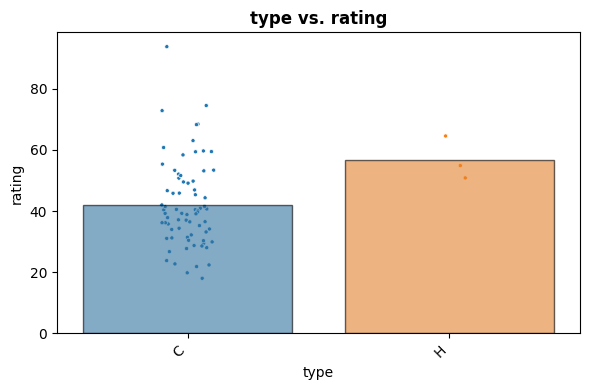

In [21]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x="type", y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, because even though theres not many ratings for hot cereals the ones that are account for are highly rated.`
  - Does this feature appear to be a predictor of the target?
    - `It's possible because people could like hot cereals better.`

___

### Feature: calories

- Calories: Calories: calories per serving
  

In [22]:
# # Confirming the dtype to select correct EDA function
feature = "calories"
df[feature].dtype

dtype('float64')

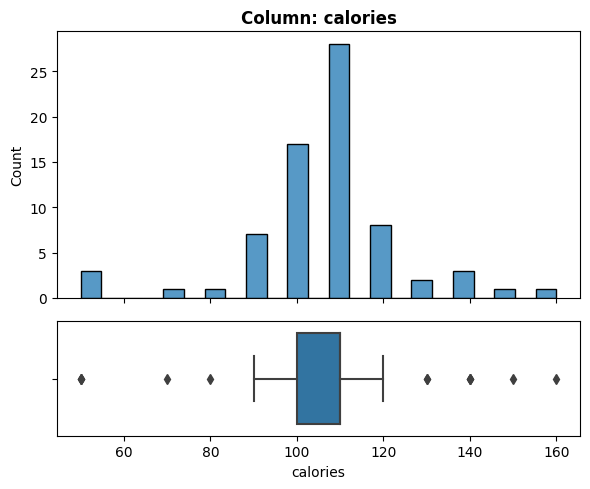

- NaN's Found: 5 (6.49%)
- Unique Values: 11
- Most common value: '110.0' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [23]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, x="calories");

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 null values
3. Is the feature constant or quasi-constant?
  - It is neither.

4. What is the cardinality? Is it high?
  - Its numeric so cardinality doesnt pertain here.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I wouldn't exclude it yet just because it's possible that the calories could play a role in its rating.



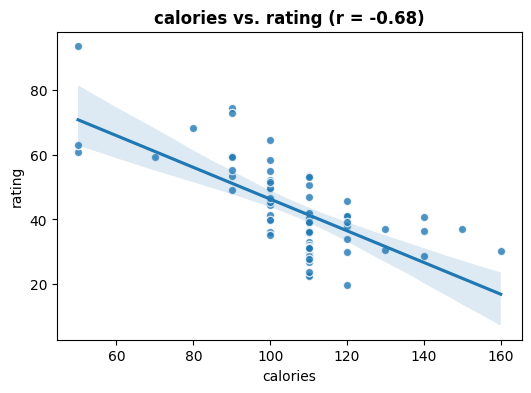

In [24]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x="calories", y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, this has a negative trendline, meaning that more calories in a cereal actually hurts their rating.`
  - Does this feature appear to be a predictor of the target?
    - `Yes, because seems like people more enjoy cereals with lower calories` ?

___

### Feature: protein

- protein: grams of protein

  

In [25]:
# # Confirming the dtype to select correct EDA function
feature = "protein"
df[feature].dtype

dtype('int64')

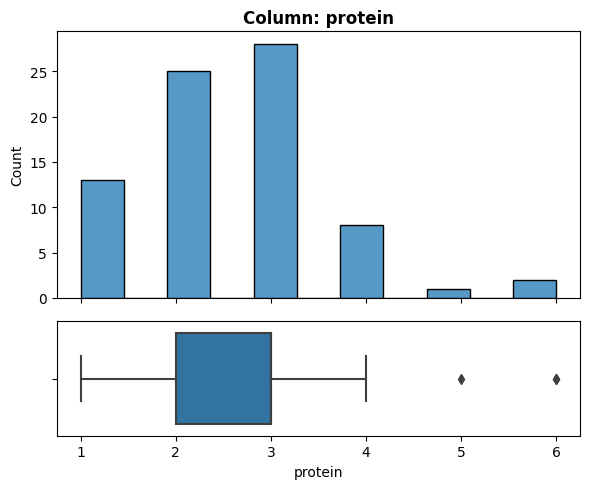

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '3' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [26]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Its numeric so cardinality doesnt pertain here.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - I would not exclude this feature because the protein level may influence its rating.



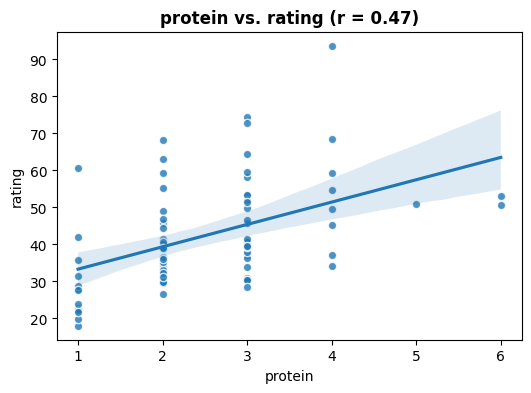

In [27]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x=feature, y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, protein and rating have a positive trend skew.`
  - Does this feature appear to be a predictor of the target?
    - `Yes, because the more protein the better the rating.` ?

___

### Feature: fat

- fat: grams of fat

In [28]:
# # Confirming the dtype to select correct EDA function
feature = "fat"
df[feature].dtype

dtype('float64')

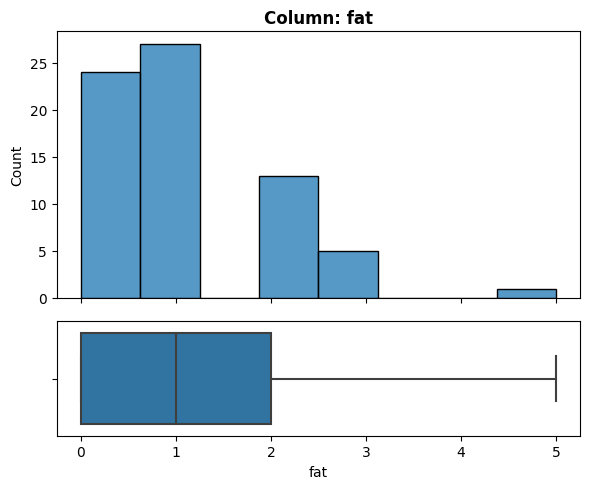

- NaN's Found: 7 (9.09%)
- Unique Values: 5
- Most common value: '1.0' occurs 27 times (35.06%)
- Not constant or quasi-constant.


In [29]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 7 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant. 

4. What is the cardinality? Is it high?
  - Its numeric so cardinality doesnt pertain here.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I would not exclude this feature because the fat levels may influence its rating.



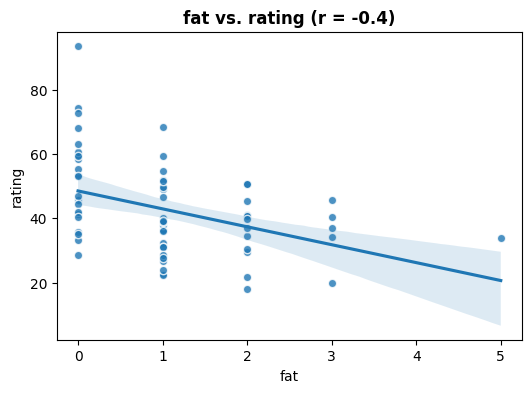

In [30]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x=feature, y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes, our plot is negatively skewed and the higher fat levels means a lower rating.` ?

___

### Feature: fiber

- fiber: grams of dietary fiber.
  

In [31]:
# # Confirming the dtype to select correct EDA function
feature = "fiber"
df[feature].dtype

dtype('float64')

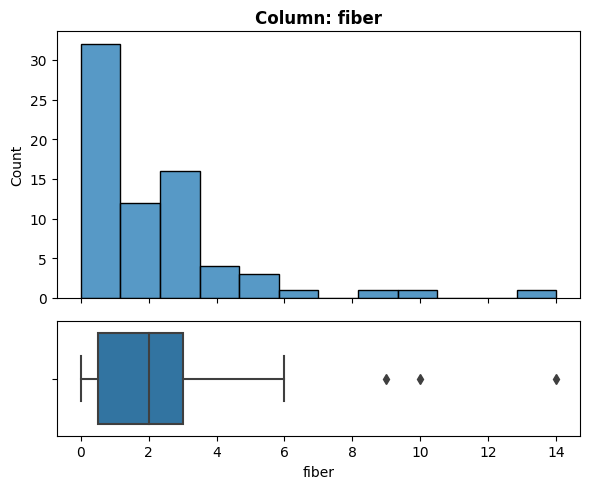

- NaN's Found: 6 (7.79%)
- Unique Values: 13
- Most common value: '0.0' occurs 18 times (23.38%)
- Not constant or quasi-constant.


In [32]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant. 

4. What is the cardinality? Is it high?
  - Its numeric so cardinality doesnt pertain here.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I would not exclude this feature because the fiber level may influence its rating.



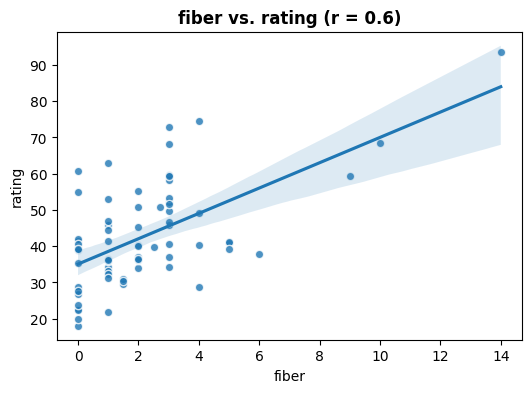

In [33]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes, our plot has a positively trendline, meaning the more grams of fiber equals to a higher rating.` 

___

### Feature: sugars

- Sugars: grams of sugars
  

In [34]:
# # Confirming the dtype to select correct EDA function
feature = "sugars"
df[feature].dtype

dtype('float64')

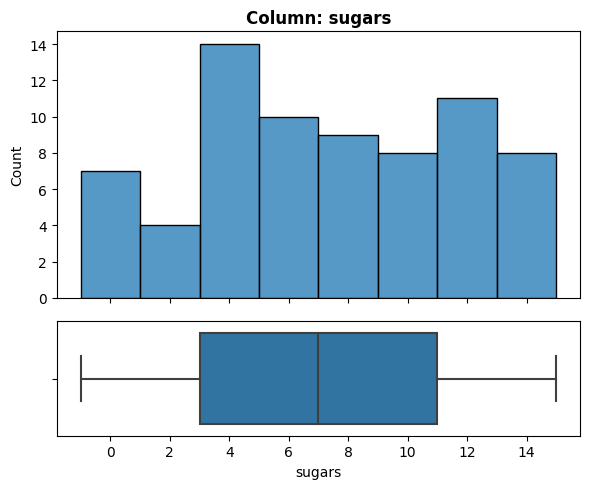

- NaN's Found: 6 (7.79%)
- Unique Values: 17
- Most common value: '3.0' occurs 13 times (16.88%)
- Not constant or quasi-constant.


In [35]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant. 

4. What is the cardinality? Is it high?
  - Its numeric so cardinality doesnt pertain here.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I would not exclude this feature because the sugar level may influence its rating.



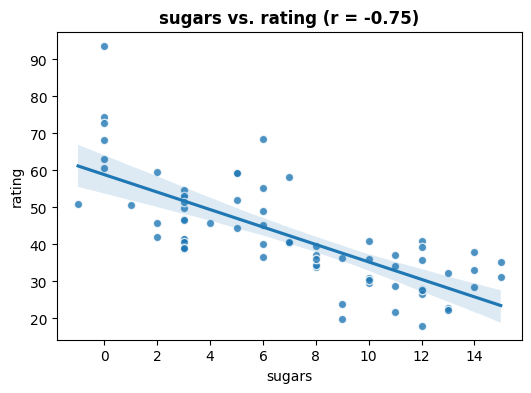

In [36]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes, our plot has a negative trendline, meaning that the sugar levels effect the rating negatively.`

___

### Feature: shelf

- shelf: display shelf (1, 2, or 3, counting from the floor)
  - (1, 2, or 3, counting from the floor)
  

In [37]:
# # Confirming the dtype to select correct EDA function
feature = "shelf"
df[feature].dtype

dtype('O')

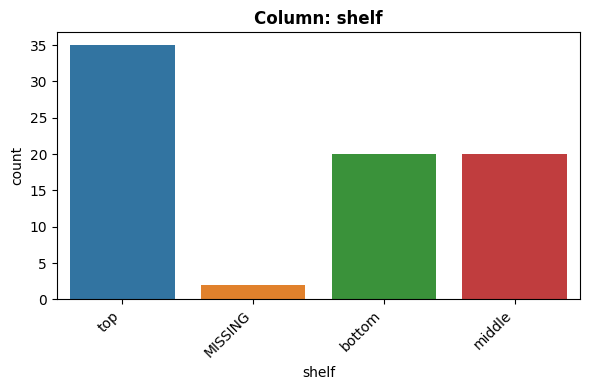

- NaN's Found: 2 (2.6%)
- Unique Values: 4
- Most common value: 'top' occurs 35 times (45.45%)
- Not constant or quasi-constant.


In [38]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical, ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 nulls

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality is not high with only 4 values counts.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - I would not exclude this feature because the shelf level may influence its rating.



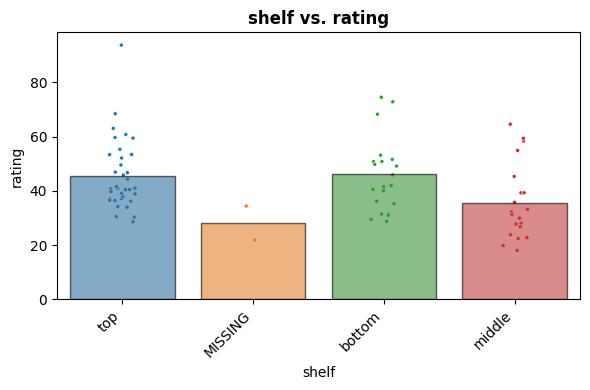

In [39]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, y="rating");

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `No`?
  - Does this feature appear to be a predictor of the target?
    - `No because regardless of being on the top or bottom shelf the same rating level is given.` 
___

# SimpleImputer Exercise

## Import the new requirements/tools

In [40]:
# Import set_config from sklearn and run the transform_output='pandas' command.
from sklearn import set_config
set_config(transform_output="pandas")
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

## Define target and features and train-test-split:



In [41]:
#Define features (X) and target y
X= df.drop(columns="rating")
y= df["rating"]

In [43]:
#Train test split the data to prepare for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,mfr,type,calories,protein,fat,fiber,sugars,shelf
30,P,C,100.0,2,0.0,0.0,15.0,bottom
40,G,C,110.0,2,1.0,0.0,3.0,middle
39,K,C,140.0,3,1.0,2.0,9.0,top
16,K,C,100.0,2,0.0,1.0,2.0,bottom
65,N,C,90.0,3,0.0,3.0,0.0,bottom


In [44]:
#Display the number of null values in X_train.
null_count = X_train.isna().sum()
null_count

mfr         2
type        0
calories    0
protein     0
fat         5
fiber       5
sugars      5
shelf       0
dtype: int64

In [45]:
#Display the data types for X_train.
X_train.dtypes

mfr          object
type         object
calories    float64
protein       int64
fat         float64
fiber       float64
sugars      float64
shelf        object
dtype: object

## Define groups of features using lists:



In [63]:
#Setting List for each type of feature
numeric_cols = ["calories", "protein", "fat", "fiber", "sugars"]
categorical_cols = ["mfr","type"]
ordinal_cols = ["shelf"]

#### Impute the numeric columns



In [64]:
# Instantiate a SimpleImputer for your numeric features that will use "median" as the strategy.
impute_median = SimpleImputer(strategy="median")

In [65]:
#Fit the simple imputer on the features in numeric_cols
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [66]:
#Transform the training data's numeric_cols and save the transformed data as "X_train_num_imputed"
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_train_num_imputed

,calories,protein,fat,fiber,sugars
30,100.0,2.0,0.0,0.0,15.0
40,110.0,2.0,1.0,0.0,3.0
39,140.0,3.0,1.0,2.0,9.0
16,100.0,2.0,0.0,1.0,2.0
65,90.0,3.0,0.0,3.0,0.0
54,50.0,1.0,0.0,0.0,0.0
31,110.0,1.0,1.0,0.0,9.0
7,130.0,3.0,2.0,2.0,8.0
62,110.0,2.0,0.0,0.0,3.0
44,150.0,4.0,3.0,3.0,11.0


In [67]:
#Transform the test data's numeric_cols and save the transformed data as "X_test_num_imputed"
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])
X_test_num_imputed

,calories,protein,fat,fiber,sugars
4,110.0,2.0,2.0,1.0,8.0
35,110.0,1.0,2.0,1.0,11.0
10,110.0,1.0,2.0,0.0,12.0
0,110.0,4.0,1.0,10.0,6.0
45,110.0,4.0,3.0,3.0,11.0
47,100.0,2.0,1.0,2.0,6.0
66,110.0,2.0,1.0,1.0,15.0
53,100.0,3.0,0.0,1.0,3.0
50,90.0,3.0,0.0,3.0,2.0
28,120.0,3.0,0.0,5.0,12.0


In [68]:
#Confirm there are 0 null values in X_train_num_imputed
X_train_num_imputed.isna().sum().sum()

0

## Impute the categorical features

In [69]:
#Instantiate a SimpleImputer for your categorical features that will use a "constant" strategy with a fill value of "MISSING."
impute_na = SimpleImputer(strategy="constant", fill_value="MISSING")

In [70]:
#Fit the simple imputer on the features in categorical_cols
impute_na.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [71]:
# Transform the training data's categorical_cols and save the transformed data as "X_train_cat_imputed"
X_train_cat_imputed = impute_na.transform(X_train[categorical_cols])

In [72]:
#Transform the test data's categorical_cols and save the transformed data as "X_test_cat_imputed"
X_test_cat_imputed = impute_na.transform(X_test[categorical_cols])

In [73]:
#Confirm there are 0 null values in X_train_cat_imputed
X_train_cat_imputed.isna().sum().sum()

0

## Impute the ordinal features



In [74]:
#Instantiate a SimpleImputer for your ordinal features that will use the "most_frequent" strategy.
impute_most_freq = SimpleImputer(strategy="most_frequent")

In [75]:
#Fit the simple imputer on the features in ordinal_cols
impute_most_freq.fit(X_train[ordinal_cols])

SimpleImputer(strategy='most_frequent')

In [76]:
#Transform the training data's ordinal_cols and save the transformed data as "X_train_ord_imputed"
X_train_ord_imputed = impute_most_freq.transform(X_train[ordinal_cols])

In [77]:
#Transform the test data's ordinal_cols and save the transformed data as "X_test_ord_imputed"
X_test_ord_imputed = impute_most_freq.transform(X_test[ordinal_cols])

In [78]:
#Confirm there are 0 null values in X_train_ord_imputed
X_train_ord_imputed.isna().sum().sum()

0